# Taller 1: Uso práctico de Numpy, Pandas y Matplotlib en Saber11

Juan David Cetina, Nicole Sofia Vangrieken, Felipe Martínez y Mariana Salas

In [5]:
# Importar las librerías para manejar y analizar datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ruta al archivo CSV
ruta_dataset = "C:\\Users\\marim\\Downloads\\Saber_11__2020-2_20250112.csv"

# Leer el archivo CSV y cargarlo en un DataFrame, indicando que los separadores son ";"
df = pd.read_csv(ruta_dataset, sep=";")

# Eliminar observaciones con NA
df_sin_na = df.dropna()

print("\nDataset después de eliminar observaciones con NA:")
print(f"Total de filas originales: {df.shape[0]}")
print(f"Total de filas después de eliminar NA: {df_sin_na.shape[0]}")

df = df_sin_na

# Cambiar nombre de variables
df.rename(columns={
    'ESTU_COD_RESIDE_MCPIO': 'MunicipioCodigo', 
    'ESTU_MCPIO_RESIDE': 'Municipio', 
    'PUNT_GLOBAL': 'PuntajeGlobal',
    'FAMI_ESTRATOVIVIENDA': 'Estrato',
    'COLE_JORNADA': 'Jornada',
    'ESTU_TIENEETNIA': 'Etnia',
    'ESTU_NSE_INDIVIDUAL': 'NivelEconomico'
}, inplace=True)


Dataset después de eliminar observaciones con NA:
Total de filas originales: 504872
Total de filas después de eliminar NA: 371826


## 1. Calcular las puntuaciones medias por municipio y crear un histograma. 📊

Promedio de puntajes globales por municipio:
MunicipioCodigo
5001.0     253.531780
5002.0     248.694268
5004.0     215.050000
5021.0     233.416667
5030.0     248.764398
              ...    
99001.0    235.345324
99524.0    238.282609
99624.0    233.692308
99773.0    219.208333
99999.0    246.000000
Name: PuntajeGlobal, Length: 1105, dtype: float64


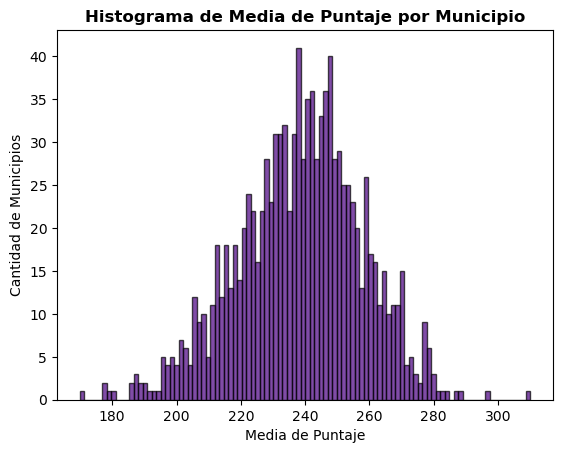

In [6]:
# Calcular el promedio de puntaje global por Municipio
promedios_por_municipio = df.groupby('MunicipioCodigo')['PuntajeGlobal'].mean()
print("Promedio de puntajes globales por municipio:")
print(promedios_por_municipio)

# Histograma
plt.hist(promedios_por_municipio, bins=100, edgecolor="black", color="indigo", alpha=0.7)
plt.xlabel("Media de Puntaje")
plt.ylabel("Cantidad de Municipios")
plt.title("Histograma de Media de Puntaje por Municipio", fontweight='bold')
plt.show()

## 2. Analizar las puntuaciones por grupo étnico y nivel socioeconómico, representando los resultados con gráficos. 📈

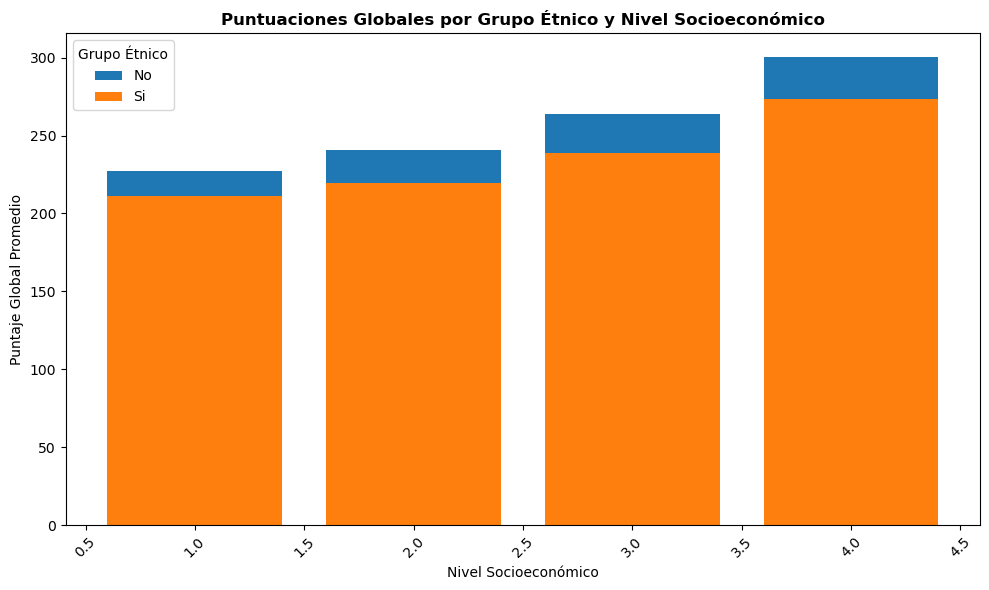

In [7]:
# Agrupar por grupo étnico y nivel socioeconómico, y calcular la media de PuntajeGlobal
df_clean = df.groupby(['Etnia', 'NivelEconomico'])['PuntajeGlobal'].mean().reset_index()

# Gráfico de barras de la media de las puntuaciones, se realiza todo en un solo gráfico para mayor facilidad
plt.figure(figsize=(10, 6))
for label, df_subset in df_clean.groupby('Etnia'):
    plt.bar(df_subset['NivelEconomico'], df_subset['PuntajeGlobal'], label=label)

plt.title('Puntuaciones Globales por Grupo Étnico y Nivel Socioeconómico', fontweight='bold')
plt.xlabel('Nivel Socioeconómico')
plt.ylabel('Puntaje Global Promedio')
plt.legend(title='Grupo Étnico')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 3. Responde a las siguientes preguntas con gráficos: ❓

### ¿Los estudiantes de estrato 6 siempre obtienen mejores resultados? 🤔

No, los estudiantes de estrato 6 no obtienen siempre los mejores resultados. Lo anterior, se debe a que hay alumnos de otros estratos que consiguen mejores puntajes globales en la Prueba Saber 11 de 2020-2. Por ejemplo, en general, los pertenecientes al estrato 4 y 5 obtienen mejores resultados. De hecho, mientras que el promedio del estrato 6 es de alrededor de 265.306, el promedio de los estratos 5 y 4 es de 277.744 y 278.581, respectivamente. Esto puede verse representado en la siguiente gráfica de barras con el promedio de cada estrato.

In [21]:
# Promedio de cada estrato
promedios_por_estrato = df.groupby('Estrato')['PuntajeGlobal'].mean().sort_values()
print(promedios_por_estrato)

# Gráfico de barras
plt.figure(figsize=(10, 6))
promedios_por_estrato.plot(kind='bar', color='blue', edgecolor="black")
plt.xlabel('Estrato')
plt.ylabel('Promedio de Resultados')
plt.title('Promedio de Resultados por Estrato', fontweight='bold')
plt.show()

#### ¿Qué modalidades de secundaria tienen los mejores y peores promedios? 🏫

Según los resultados de la Prueba Saber 11 de 2020-2, tras limpiar los datos con dropna(), la modalidad con el mejor promedio es la completa y la del peor es la sabatina. De hecho, la completa se destaca por su promedio de 280.167, mientras que la jornada única, de la mañana y de la tarde obtienen puntajes más bajos pero similares entre ellos, con 251.701, 250.327 y 246.303 aproximadamente. Por otra parte, las jornadas sabatinas y de la noche obtienen peores resultados a comparación de los demás, con medias de 212.923 y 214.944, respectivamente. Lo anterior, puede verse representado en la siguiente gráfica de barras del promedio del puntaje por jornada.

Jornada
SABATINA    212.923130
NOCHE       214.944990
TARDE       246.303146
MAÑANA      250.326545
UNICA       251.701273
COMPLETA    280.167257
Name: PuntajeGlobal, dtype: float64


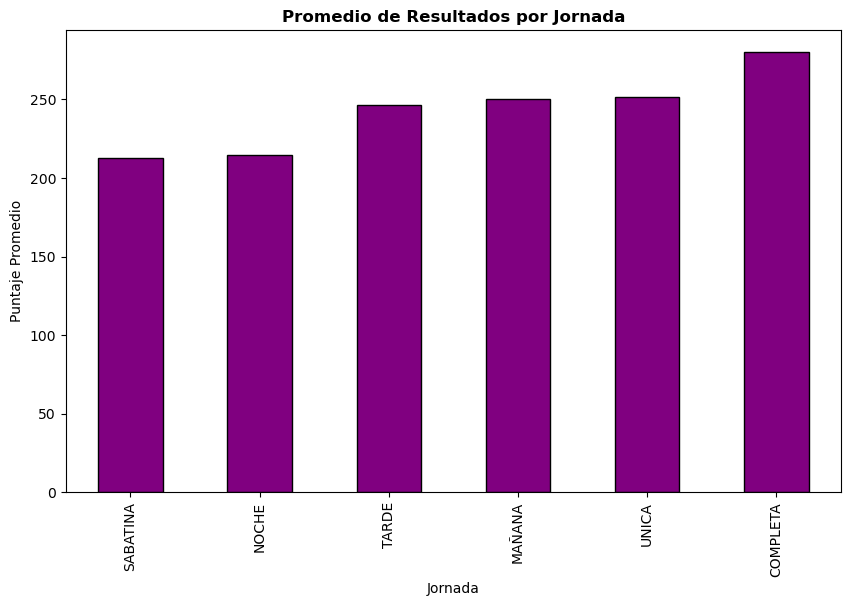

In [8]:
# Calcular los promedios por jornada
promedios_jornada = df.groupby('Jornada')['PuntajeGlobal'].mean().sort_values()
print(promedios_jornada)

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
promedios_jornada.plot(kind='bar', color='purple', edgecolor="black")
plt.xlabel('Jornada')
plt.ylabel('Puntaje Promedio')
plt.title('Promedio de Resultados por Jornada', fontweight='bold')
plt.show()